# Abstract

In this notebook, AutoML is used for three different tasks, regression, binary classification and multiclass classification. For the regression task, the used dataset is "Boston House Pricing Dataset". By applying AutoML, the price of a house in Boston could be predicted based on attributes like room numbers and location. For the binary classification, the used dataset is "Breast Cancer Dataset", after applying AutoML, the type of a tumor could be predicted based on the size, the texture and the shape. For the multiclass classification, the used dataset is "Customer Complaint Dataset", by training the AutoML model, the model could classify the type of a customer complaint by the texts a customer submits. 

Each task is started by analyzing the dataset, including check the mean, std and var of the dataset, checking the distribution of each independent variable and their correlation with each other. After analyzing and have a basic overview of the dataset, automl is set up for each problem. After training for a period of time, different evaluation metrics are used to evaluate the performance of the automl model. Details will be explained by the end of each model.

In this notebook, packages like h2o, pandas, numpy and matplotlib will be used. For each task, the notebook has done analysis to answer the following questions:
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

## Regression

In [561]:
# Install and import packages ///Citation 1
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt # plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [562]:
# Import Data ///Citation 3
df = pd.read_csv('Boston-house-price-data.csv.xls', delimiter=',')
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79,19.4
375,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,15.0
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,8.8


In [563]:
# Check the information of the data ///Citation 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [564]:
# Check if there're missing values ///Citation 3
print('total number of null values : {0}'.format(df.isna().sum().sum()))

total number of null values : 0


Fortunately, ***no missing data*** is in the boston house pricing dataset. And we can observe that all columns are numeric datatype.

In [565]:
# Get the description of the dataset ///Citation 3
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Heat Map of the Correlation Between All the Features')

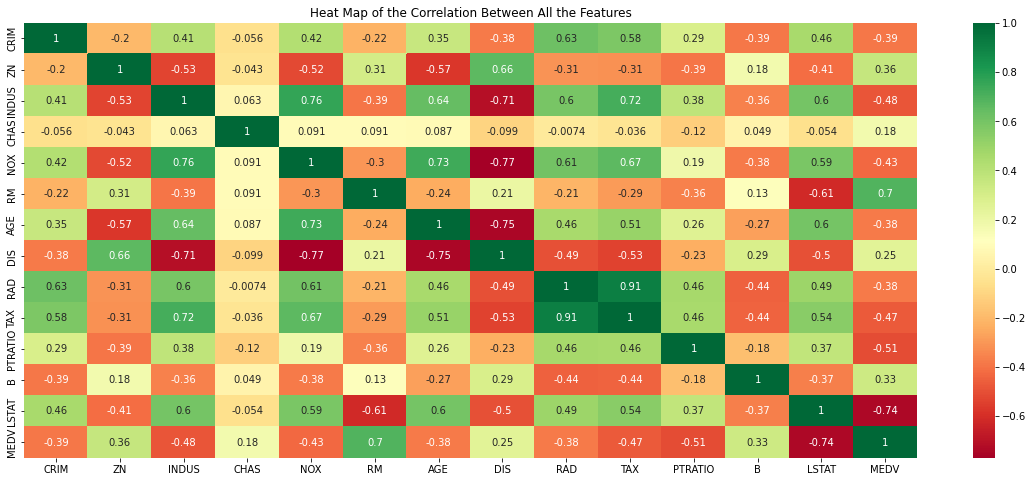

In [566]:
# Visualize the data, plot the heatmap of the correlation between all the features ///Citation 1
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Heat Map of the Correlation Between All the Features')

***1. Is the relationship significant?***

***Ans: From the heat map, we can tell that many variables have relationships with other variables, especially, RAD is significantly related to TAX.***

<Figure size 576x360 with 0 Axes>

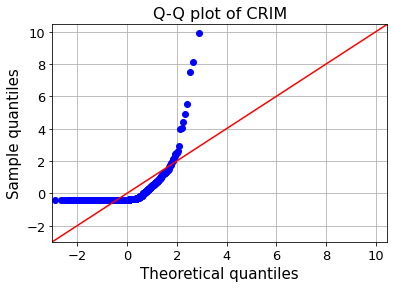

<Figure size 576x360 with 0 Axes>

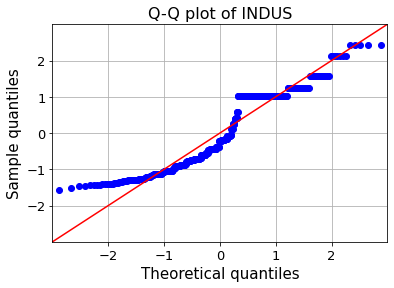

<Figure size 576x360 with 0 Axes>

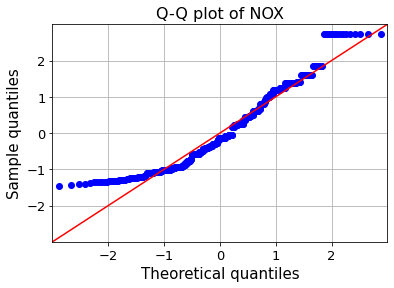

<Figure size 576x360 with 0 Axes>

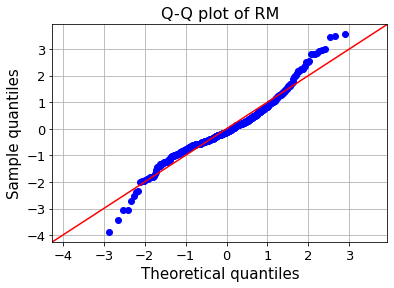

<Figure size 576x360 with 0 Axes>

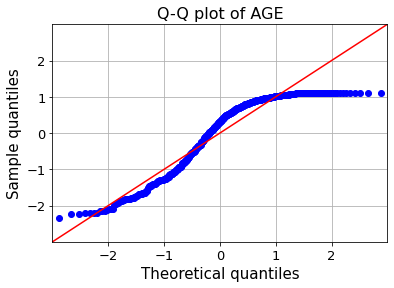

<Figure size 576x360 with 0 Axes>

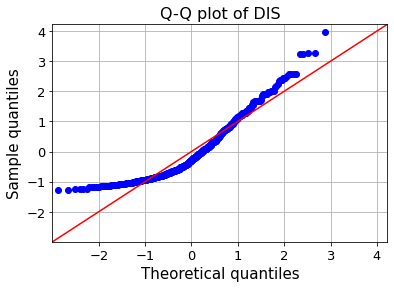

<Figure size 576x360 with 0 Axes>

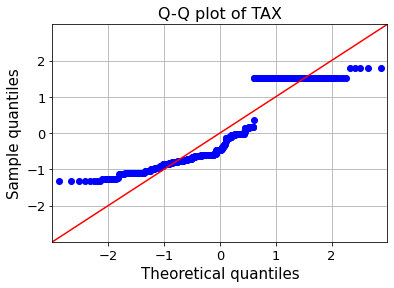

<Figure size 576x360 with 0 Axes>

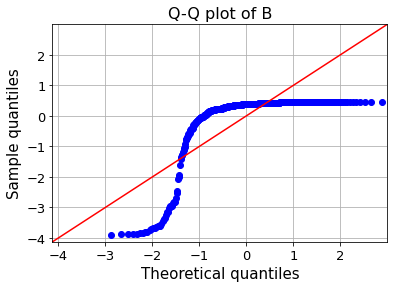

<Figure size 576x360 with 0 Axes>

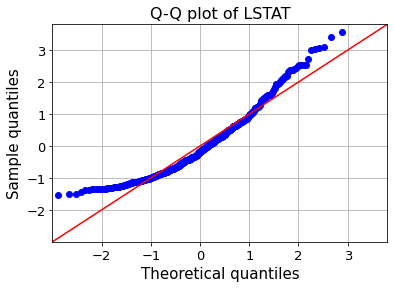

In [567]:
# Plot the QQ-Plot and analyze if the variables follow normal distribution ///Citation 1
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

***2. Are any model assumptions violated?***




***Ans: Linear Regression assumes all the independent variables follow a normal distribution, from the QQ-plot, we can tell some independent variables don't follow a normal distribution, for these variables, normalization is required to be applied.***


---



***!!! This cell below is originally written !!!***




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


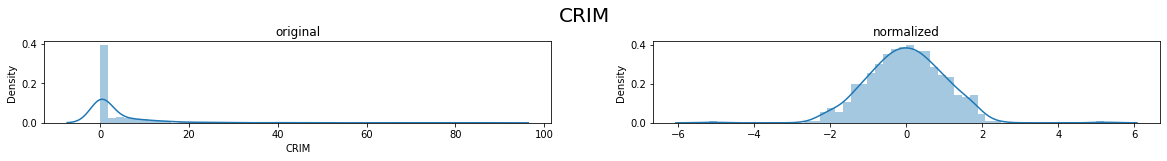

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


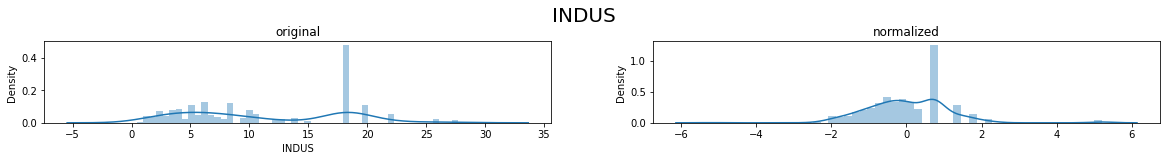

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


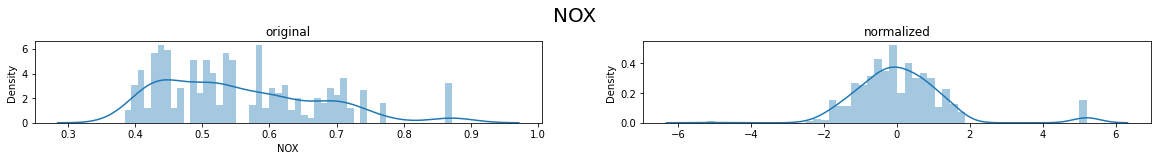

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


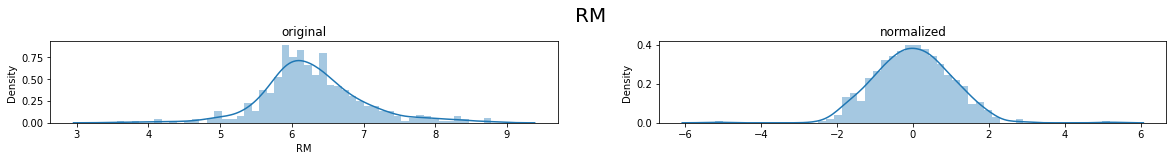

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


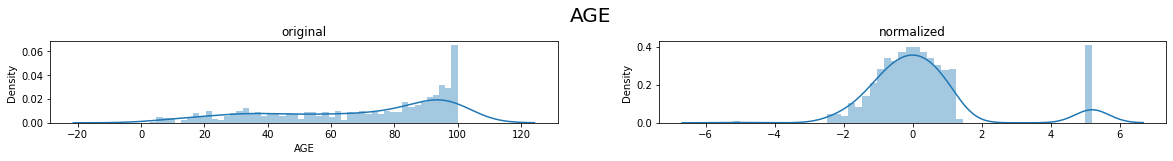

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


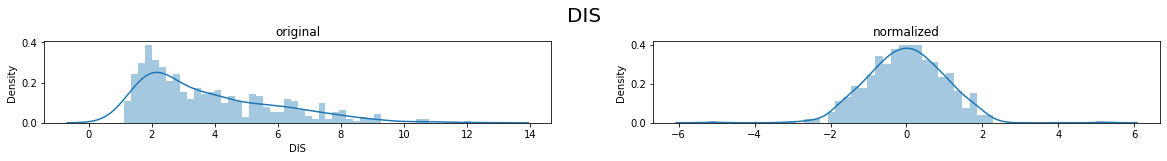

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


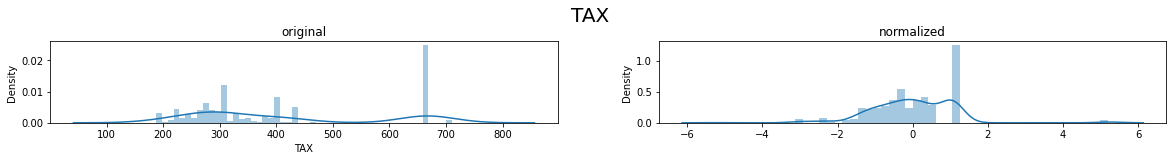

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


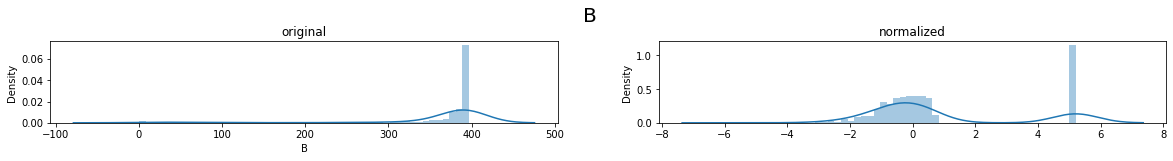

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


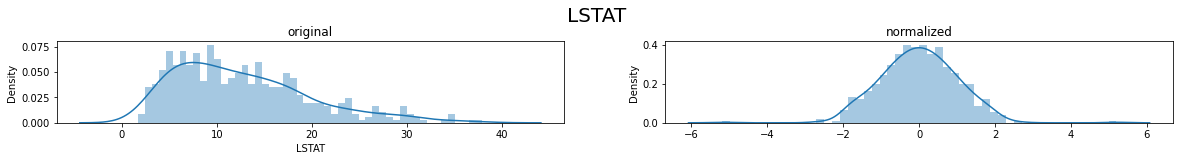

In [568]:
# Normalize the data
from sklearn import preprocessing
columns = [col for col in df.columns if len(np.unique(df[col]))>50]
columns.remove('MEDV')
for col in columns:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,1.5))
    
    sns.distplot(df[col],bins=50,ax=ax[0])
    ax[0].set_title('original')
    
    quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',n_quantiles=int(len(df)/20), random_state=0)
    X_trans = quantile_transformer.fit_transform(df[col].values.reshape((len(df),1)))
    sns.distplot(X_trans,bins=50,ax=ax[1])
    ax[1].set_title('normalized')
    
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

***After applying normalization on independent variables, the distributions are more like normal. Thus, the model assumption is not violated.***

***!!! This cell below is originally written !!!***




In [569]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

***!!! This cell below is originally written !!!***




In [570]:
# Check multicollinearity of the dataset using vif
X = df.iloc[::-1]
calc_vif(X)

,variables,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


***3. Is there any multicollinearity in the model?***

***Ans: From the VIF result, we can see that many independent variables are correlated with each other.***

***4. In the multivariate models are predictor variables independent of all the other predictor variables?***

***Ans: No, from the heat map and the VIF result, we can see some predictor variables are highly related to other predictor variables.***

In [571]:
# Define a function to get the independent variables ///Citation 1
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [572]:
# Initialize the h2o ///Citation 1
min_mem_size=6 
run_time=222
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:30701 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc1ptvd60
  JVM stdout: /tmp/tmpc1ptvd60/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc1ptvd60/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:30701
Connecting to H2O server at http://127.0.0.1:30701 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_1uipvy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


***!!! This cell below is originally written !!!***




In [589]:
# Split the train, validation and test dataset
data = h2o.import_file('Boston-house-price-data.csv.xls')
trainset, testset, valid = data.split_frame(ratios=[0.6, 0.2])
y = "MEDV"
# trainset = trainset.drop('MEDV')
x = trainset.columns
print(x)
x = x[:-1:]
print(x)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## Regression

In [590]:
# Set up AutoML ///Citation 1
from sklearn.model_selection import train_test_split

In [591]:
# Start training with AutoML ///Citation 1
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=trainset, validation_frame = valid)

AutoML progress: |
00:52:42.943: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.9118538,0.1375807,1.9996096,2.0777996,1.8623896,1.9023942,1.7170757
mean_residual_deviance,8.02582,4.9353557,16.739107,6.9827514,5.860389,5.812465,4.734386
mse,8.02582,4.9353557,16.739107,6.9827514,5.860389,5.812465,4.734386
null_deviance,4804.081,1598.9298,3384.0835,7280.1616,5448.1577,3623.222,4284.7793
r2,0.8805498,0.1023244,0.6986548,0.9292170,0.9383536,0.9072811,0.9292426
residual_deviance,482.8297,303.611,1004.3464400,488.7926,334.0422,331.31052,255.65685
rmse,2.7482858,0.7687205,4.0913453,2.6424897,2.420824,2.4109054,2.1758645
rmsle,0.1216513,0.0199797,0.1412579,0.1053652,0.1154857,0.1018013,0.1443461


In [592]:
# Calculate the training time ///Citation 1
meta_data={}
meta_data['model_execution_time'] = {"regression":(time.time() - model_start_time)} 

In [593]:
# Show the training time ///Citation 1
meta_data

{'model_execution_time': {'regression': 4101.259910106659}}

In [594]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                                                   rmse       mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_3_20221108_05242  2.85431   8.14707  1.92697  0.12299                    8.14707
StackedEnsemble_AllModels_1_AutoML_3_20221108_05242     2.92376   8.54836  1.96073  0.125493                   8.54836
GBM_2_AutoML_3_20221108_05242                           3.00884   9.05311  1.96464  0.127179                   9.05311
XRT_1_AutoML_3_20221108_05242                           3.02144   9.12909  2.05575  0.126671                   9.12909
GBM_4_AutoML_3_20221108_05242                           3.07632   9.46377  2.00225  0.132307                   9.46377
GBM_3_AutoML_3_20221108_05242                           3.09187   9.55969  2.03423  0.132708                   9.55969
XGBoost_2_AutoML_3_20221108_05242                       3.12025   9.73594  2.20237  0.132065                   9.73594
XGBoost_3_AutoML_3_20221108_05242               

## Examine the Best Model

In [595]:
# Get the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])

In [596]:
# Print the best model ///Citation 1
best_model.algo

'gbm'

In [597]:
# Import the packages for plotting ///Citation 1
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

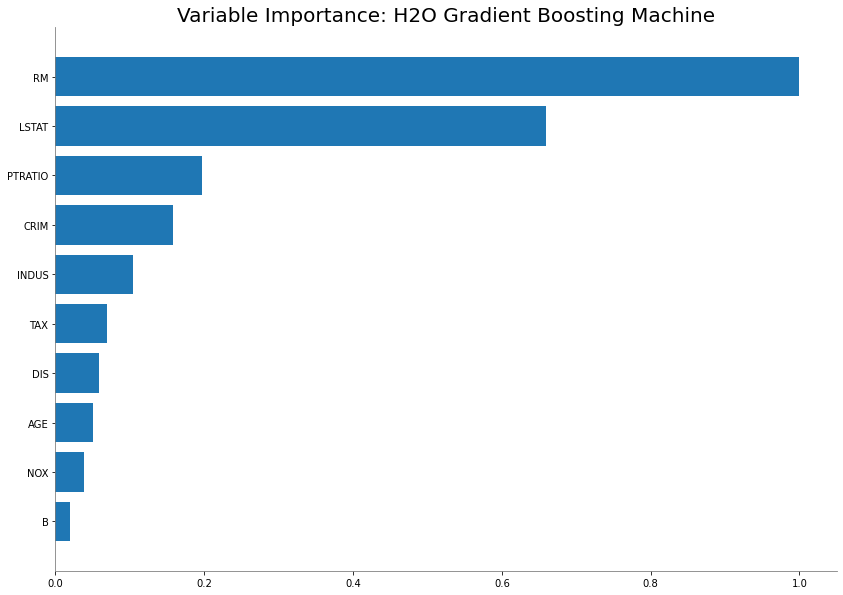

<Figure size 432x288 with 0 Axes>

In [598]:
# Plot the importance ranking of the predictor variables ///Citation 1
best_model.varimp_plot()

***5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

***Ans: The importance rank of each predictor variable is shown above. To exclude the insignificant ones, we will remove the predictor variable "NOX" and "B"***

***!!! This cell below is originally written !!!***




In [599]:
# Remove the insignificant predictor variables
trainset = trainset.drop('B')
trainset = trainset.drop('NOX')
valid = valid.drop('B')
valid = valid.drop('NOX')
testset = testset.drop('B')
testset = testset.drop('NOX')
print(trainset, valid)

   CRIM    ZN    INDUS    CHAS     RM    AGE     DIS    RAD    TAX    PTRATIO    LSTAT    MEDV
0.02731   0       7.07       0  6.421   78.9  4.9671      2    242       17.8     9.14    21.6
0.03237   0       2.18       0  6.998   45.8  6.0622      3    222       18.7     2.94    33.4
0.06905   0       2.18       0  7.147   54.2  6.0622      3    222       18.7     5.33    36.2
0.08829  12.5     7.87       0  6.012   66.6  5.5605      5    311       15.2    12.43    22.9
0.21124  12.5     7.87       0  5.631  100    6.0821      5    311       15.2    29.93    16.5
0.17004  12.5     7.87       0  6.004   85.9  6.5921      5    311       15.2    17.1     18.9
0.11747  12.5     7.87       0  6.009   82.9  6.2267      5    311       15.2    13.27    18.9
0.62976   0       8.14       0  5.949   61.8  4.7075      4    307       21       8.26    20.4
0.63796   0       8.14       0  6.096   84.5  4.4619      4    307       21      10.26    18.2
1.05393   0       8.14       0  5.935   29.3  4.49

***!!! This cell below is originally written !!!***




In [600]:
# Remove the target from train set
x = trainset.columns
x = x[:-1:]
print(x, y)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'] MEDV


Now we apply AutoML again

In [601]:
# Train the AutoML model again ///Citation 1
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=trainset, validation_frame = valid)

AutoML progress: |
00:54:42.647: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.9503474,0.0800207,2.0556812,1.9942698,1.9522854,1.8507168,1.8987839
mean_residual_deviance,8.3795595,4.9041977,17.129103,6.740058,6.213526,5.7512794,6.0638313
mse,8.3795595,4.9041977,17.129103,6.740058,6.213526,5.7512794,6.0638313
null_deviance,4804.081,1598.9298,3384.0835,7280.1616,5448.1577,3623.222,4284.7793
r2,0.8751161,0.1032954,0.6916339,0.9316772,0.9346389,0.9082571,0.9093735
residual_deviance,501.7982,299.99185,1027.7461,471.80408,354.17096,327.8229,327.4469
rmse,2.8176513,0.7419578,4.138732,2.596162,2.4926944,2.3981824,2.4624848
rmsle,0.1303071,0.0269820,0.1434807,0.1038471,0.1247296,0.1094950,0.1699831


In [602]:
# Calculate and plot the training time ///Citation 1
meta_data={}
meta_data['model_execution_time'] = {"regression":(time.time() - model_start_time)} 
meta_data

{'model_execution_time': {'regression': 4216.683512687683}}

In [603]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                                                   rmse       mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_4_20221108_05442  2.91026   8.46959  1.97391  0.132088                   8.46959
StackedEnsemble_AllModels_1_AutoML_4_20221108_05442     2.95912   8.75642  1.99273  0.132649                   8.75642
GBM_4_AutoML_4_20221108_05442                           2.97611   8.85725  2.02697  0.133824                   8.85725
GBM_2_AutoML_4_20221108_05442                           3.02447   9.14742  2.08399  0.135609                   9.14742
XGBoost_3_AutoML_4_20221108_05442                       3.02461   9.1483   2.10864  0.13961                    9.1483
GBM_3_AutoML_4_20221108_05442                           3.11289   9.69006  2.10179  0.138779                   9.69006
XRT_1_AutoML_4_20221108_05442                           3.18351  10.1347   2.1488   0.13609                   10.1347
DRF_1_AutoML_4_20221108_05442                     

In [604]:
# Find the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])


In [605]:
# Print the best model ///Citation 1
best_model.algo

'gbm'

After removing the insignificant predictor variables, the best model is now 'gbm' but the mse increased a bit.

***6. Does the model make sense?***

***Ans: The model makes sense, according to the model, we can see the house price is most related to the variable 'RM', which represents the room number per dwelling. It makes sense since the more rooms are on a dwelling, the higher the house price should be, it should be of a linear relationship to some extent.***

***!!! This cell below is originally written !!!***




In [614]:
# Add regularization and regularizor search to the model
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

# trainset, testset, valid = data.split_frame(ratios=[.7, .15])
# x = trainset.columns
# y = "MEDV"
hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the glm estimator
gdm_2 = H2OGeneralizedLinearEstimator(family = 'gamma')

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = gdm_2, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = x, y = y, training_frame = trainset, validation_frame = valid)

# sort the grid models by decreasing MAE
sorted_grid = grid.get_grid(sort_by = 'mae', decreasing = True)
print(sorted_grid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing mae
    lambda    model_ids                                                       mae
--  --------  --------------------------------------------------------------  -------
    1         Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_1  3.03642
    0.5       Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_2  2.91635
    0         Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_8  2.85943
    1e-05     Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_7  2.85942
    0.0001    Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_6  2.85938
    0.001     Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_5  2.85898
    0.01      Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_4  2.85496
    0.1       Grid_GLM_py_536_sid_b375_model_python_1667868586318_57_model_3 

***7. Does regularization help?***

***Ans: Yes, after applying the regularization, the mae has reduced with a well-chosen regularizor(lambda). When the regularizor is 0, the mae is 2.86, when the regularizor is 0.1, the mae could be reduced to 2.84, while when the regularizor is 1, the mae is increased to 3.04, so we need to be careful when choosing a regularizor.***

***8. Which independent variables are significant?***

***Ans: As shown in the figure which ranks the importance of independent variables, the 'RM' is the most important one, which indicates the room number in each dwelling, and it makes sense that it has the highest relationship with the price of a house.***

***9. Which hyperparameters are important?***

***Ans: Regularizor is important in this model. A hyperparameter algorithm search is used to find the optimal hyperparameter based on the mae.***

***10. Evaluation of the Model***

**Ans: The performance of the model could be evaluated in multiple metrics, including rmse, mse, mae, etc. For a regression model, we usually care about the mse or mae, the smaller it is, the better a model performs. In our case, after adding regularization, the mae has reduced to 2.84, which indicates our prediction is quite accurate. To prevent overfitting, regularization is used. Apart from regularization, cross validation is also used to prevent overfitting.***

## Binary Classification

In [ ]:
# Import dataset for the binary classification task ///Citation 4
df=pd.read_csv("data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In this problem, we are trying to classify which type of cancer a patient has. It has two classes, "B" and "M" which stands for "benign" and "malignant".

In [615]:
# View the first couple of lines of the dataset ///Citation 4
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [616]:
# Overview of the dataset ///Citation 4
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [618]:
# See the correlation between the independent variables numerically ///Citation 4
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


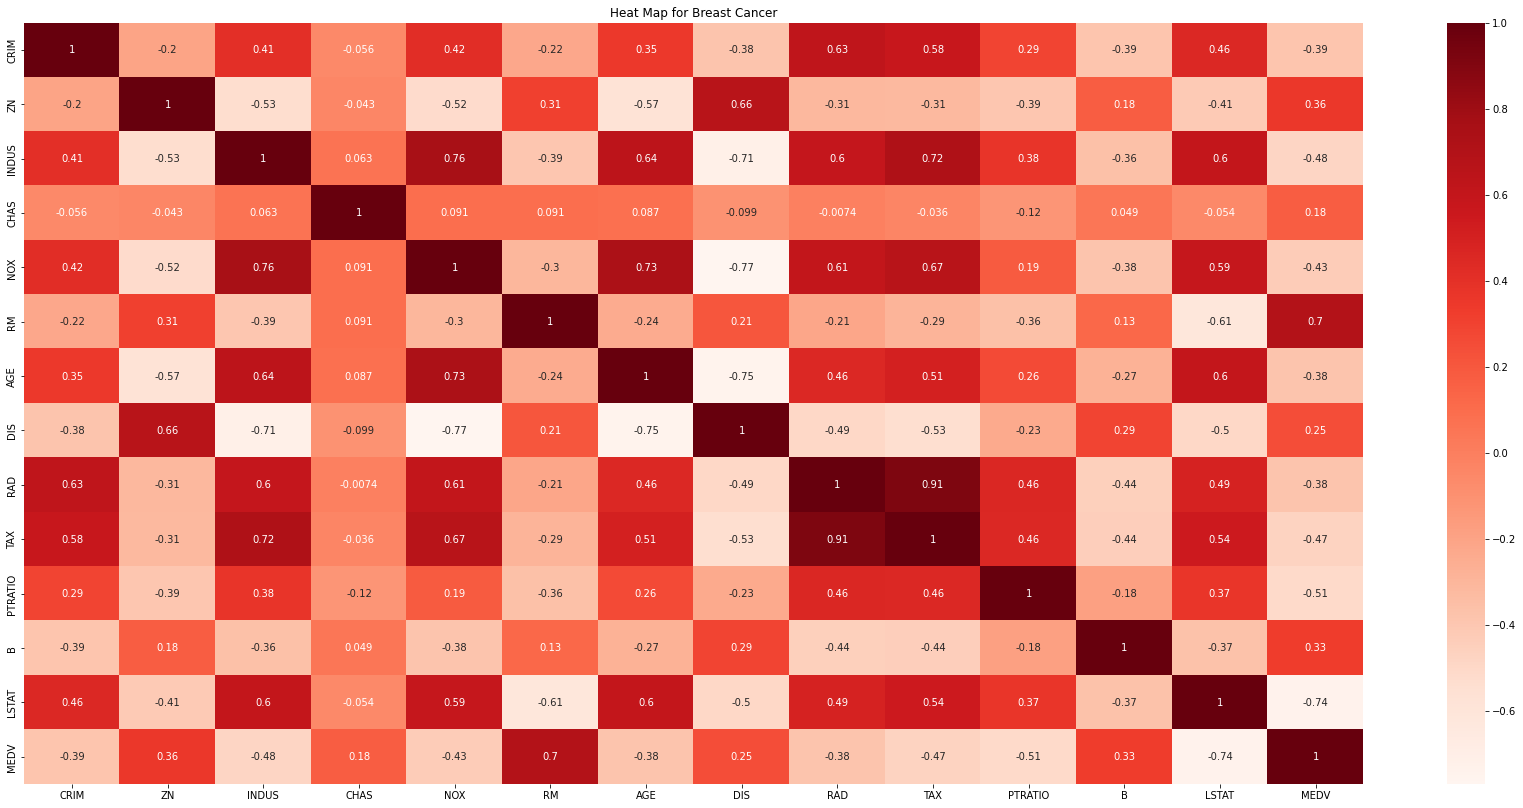

In [619]:
# Plot the correlation between independent variables ///Citation 4
plt.figure(figsize=(30,14))
plt.title("Heat Map for Breast Cancer")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

***1. Is the relationship significant?***

**Ans: From the figure, we can see that some independent variables are highly related to others, as the closer their relationships are, the darker the red is.**

***2. Are any model assumptions violated?***

**Ans: Currently our data is violating one of the assumptions that all independent variables should not have relationships with other independent variables.**

***3. Is there any multicollinearity in the model?***

***Ans: From the heat map, we can see there is multicollinearity in the dataset, for example, the correlation between radius mean and perimeter mean is 1, which means they are the same thing. To remove these multicollineraity, we can drop some attributes which could be expressed by other highly related independent variables.***

***!!! This cell below is originally written !!!***




In [620]:
# Remove the variables that are highly correlated to others
df=h2o.import_file("data.csv")
df = df.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst','area_worst', 'texture_worst', 'concave points_mean'
, 'perimeter_se', 'area_se','concavity_mean', 'concavity_worst', 'concavity_se', 'concave points_worst'], axis = 1)
print(df.columns)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'C33']


***4. In the multivariate models are predictor variables independent of all the other predictor variables?***

***Ans: After dumping some highly related predictor variables,now the predictor variables can be considered as independent of all the other predictor variables.***

In [621]:
# Set up AutoML ///Citation 1

aml = H2OAutoML(max_runtime_secs=run_time)

In [622]:
# Start training the AutoML model ///Citation 1
model_start_time = time.time()
trainset, testset, valid = df.split_frame(ratios = [0.6, 0.2])
y = 'diagnosis'
X = trainset.columns
X_train = X[:1] + X[2:]
try:
  aml.train(x=X_train,y=y,training_frame=df)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)

AutoML progress: |
01:00:21.78: _train param, Dropping bad and constant columns: [C33]

█
01:00:23.835: _train param, Dropping bad and constant columns: [C33]


01:00:25.183: _train param, Dropping bad and constant columns: [C33]

███
01:00:30.753: _train param, Dropping unused columns: [C33]


01:00:31.512: _train param, Dropping bad and constant columns: [C33]

█
01:00:34.376: _train param, Dropping bad and constant columns: [C33]

█
01:00:36.411: _train param, Dropping bad and constant columns: [C33]

█
01:00:41.428: _train param, Dropping bad and constant columns: [C33]

██
01:00:46.114: _train param, Dropping bad and constant columns: [C33]

█
01:00:50.906: _train param, Dropping unused columns: [C33]
01:00:51.466: _train param, Dropping unused columns: [C33]
01:00:52.94: _train param, Dropping bad and constant columns: [C33]

█
01:00:54.282: _train param, Dropping bad and constant columns: [C33]

█
01:00:56.521: _train param, Dropping bad and constant columns: [C33]

██
01:00:59.

In [623]:
# Calculate the training time ///Citation 1
d=meta_data['model_execution_time']
d['classification']=(time.time() - model_start_time)
meta_data['model_execution_time'] = d

In [624]:
# Plot the training time ///Citation 1
meta_data

{'model_execution_time': {'regression': 4216.683512687683,
  'classification': 227.14052772521973}}

In [625]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_4_AutoML_5_20221108_10021  0.993764  0.0934069  0.991299               0.0386211  0.164402  0.0270279
GBM_grid_1_AutoML_5_20221108_10021_model_13             0.99346   0.102193   0.990448               0.0361899  0.171625  0.0294552
StackedEnsemble_BestOfFamily_3_AutoML_5_20221108_10021  0.992634  0.0963121  0.990415               0.0409796  0.165408  0.0273598
DeepLearning_grid_1_AutoML_5_20221108_10021_model_1     0.992561  0.123874   0.989405               0.039949   0.180387  0.0325393
GBM_grid_1_AutoML_5_20221108_10021_model_2              0.992508  0.112241   0.988235               0.039949   0.181055  0.0327808
StackedEnsemble_AllModels_3_AutoML_5_20221108_10021     0.992383  0.176205   0.989253               0.039949   0.207867  0.0432088
StackedEnsemble_AllModels_4_AutoML_5_20221108_10021     0.99227   0.176229   0.9890

In [626]:
# Find the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])


In [627]:
# Print the best model ///Citation 1
best_model.algo

'stackedensemble'

In [628]:
# Print the auc of the model ///Citation 1
print(best_model.auc(train = True))

0.9994186353786797


In [629]:
# Print the log loss of the model ///Citation 1
print(best_model.logloss(train = True))

0.03582327042285591


In [631]:
# Plot the confusion matrices for the model ///Citation 1
cf=best_model.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
cf

[Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
Total  362  207  0.0088   (5.0/569.0),
 Confusion Matrix (Act/Pred) for max f2 @ threshold = 0.30321775626460823
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      350  7    0.0196   (7.0/357.0)
M      1    211  0.0047   (1.0/212.0)
Total  351  218  0.0141   (8.0/569.0),
 Confusion Matrix (Act/Pred) for max f0point5 @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
Total  362  207  0.0088   (5.0/569.0),
 Confusion Matrix (Act/Pred) for max accuracy @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
T

***!!! This cell below is originally written !!!***




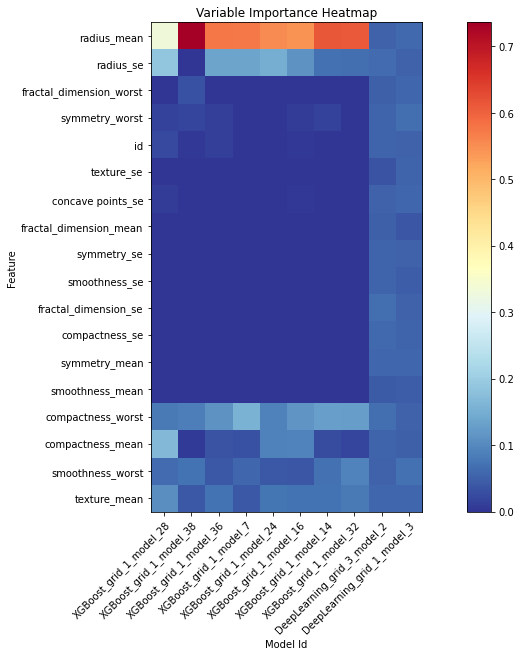

In [632]:
# The variable importance plot function for stackedensemble is not implemented in h2o yet, instead, 
# a heat map is plotted to show the importance of the variables.
va_plot = h2o.varimp_heatmap(aml.leaderboard.sort("auc").head(10))

***In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

***Ans: From the Heatmap shown above, we can tell that the radius mean is the most important predictor variable, and fractal dimension mean is the least significant predictor variable.***

In [633]:
# Exclude the insignificant variable and train the automl model again ///Citation 1
X_train_1 = X_train[:6] + X_train[7:]
# print(X_train_1)
# X_train = X_train.remove(fractal_dimension_mean)
# print(X_train, y)
try:
  aml.train(x=X_train_1,y=y,training_frame=df)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)

AutoML progress: |
01:00:21.78: _train param, Dropping bad and constant columns: [C33]
01:00:23.835: _train param, Dropping bad and constant columns: [C33]
01:00:25.183: _train param, Dropping bad and constant columns: [C33]
01:00:30.753: _train param, Dropping unused columns: [C33]
01:00:31.512: _train param, Dropping bad and constant columns: [C33]
01:00:34.376: _train param, Dropping bad and constant columns: [C33]
01:00:36.411: _train param, Dropping bad and constant columns: [C33]
01:00:41.428: _train param, Dropping bad and constant columns: [C33]
01:00:46.114: _train param, Dropping bad and constant columns: [C33]
01:00:50.906: _train param, Dropping unused columns: [C33]
01:00:51.466: _train param, Dropping unused columns: [C33]
01:00:52.94: _train param, Dropping bad and constant columns: [C33]
01:00:54.282: _train param, Dropping bad and constant columns: [C33]
01:00:56.521: _train param, Dropping bad and constant columns: [C33]
01:00:59.959: _train param, Dropping bad and co

In [634]:
# Calculate the training time ///Citation 1
d=meta_data['model_execution_time']
d['classification']=(time.time() - model_start_time)
meta_data['model_execution_time'] = d

In [635]:
# Print the training time ///Citation 1
meta_data

{'model_execution_time': {'regression': 4216.683512687683,
  'classification': 501.64898586273193}}

In [636]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_4_AutoML_5_20221108_10021  0.993764  0.0934069  0.991299               0.0386211  0.164402  0.0270279
GBM_grid_1_AutoML_5_20221108_10021_model_13             0.99346   0.102193   0.990448               0.0361899  0.171625  0.0294552
StackedEnsemble_BestOfFamily_3_AutoML_5_20221108_10021  0.992634  0.0963121  0.990415               0.0409796  0.165408  0.0273598
DeepLearning_grid_1_AutoML_5_20221108_10021_model_1     0.992561  0.123874   0.989405               0.039949   0.180387  0.0325393
GBM_grid_1_AutoML_5_20221108_10021_model_2              0.992508  0.112241   0.988235               0.039949   0.181055  0.0327808
GBM_grid_2_AutoML_6_20221108_10456_model_10             0.992389  0.107868   0.988676               0.0375905  0.175424  0.0307735
StackedEnsemble_AllModels_3_AutoML_5_20221108_10021     0.992383  0.176205   0.9892

In [637]:
# Find the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])


In [638]:
# Print the best model ///Citation 1
best_model.algo

'stackedensemble'

In [639]:
# Print the auc of the model ///Citation 1
print(best_model.auc(train = True))

0.9994186353786797


In [640]:
# Print the log loss of the model ///Citation 1
print(best_model.logloss(train = True))

0.03582327042285591


In [641]:
# Plot the confusion matrices for the model ///Citation 1
cf=best_model.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
cf

[Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
Total  362  207  0.0088   (5.0/569.0),
 Confusion Matrix (Act/Pred) for max f2 @ threshold = 0.30321775626460823
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      350  7    0.0196   (7.0/357.0)
M      1    211  0.0047   (1.0/212.0)
Total  351  218  0.0141   (8.0/569.0),
 Confusion Matrix (Act/Pred) for max f0point5 @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
Total  362  207  0.0088   (5.0/569.0),
 Confusion Matrix (Act/Pred) for max accuracy @ threshold = 0.504238660088343
       B    M    Error    Rate
-----  ---  ---  -------  -----------
B      357  0    0        (0.0/357.0)
M      5    207  0.0236   (5.0/212.0)
T

***6. Does the Model Make Sense?***

***Ans: Yes, the model makes sense, as if a tumor is benign is highly related to its size, texture and shape. The model indicates the same thing.***

***!!! This cell below is originally written !!!***




In [642]:
# Add regularization and regularizor search algorithm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

# trainset, testset, valid = data.split_frame(ratios=[.7, .15])
# x = trainset.columns
# y = "MEDV"
hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the glm estimator
gdm_2 = H2OGeneralizedLinearEstimator(family = 'fractionalbinomial')

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = gdm_2, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = X_train_1, y = y, training_frame = trainset, validation_frame = valid)

# sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by = 'auc', decreasing = True)
print(sorted_grid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing auc
    lambda    model_ids                                                          auc
--  --------  -----------------------------------------------------------------  --------
    0.01      Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_4  0.998005
    0.001     Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_5  0.99734
    0.1       Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_3  0.997008
    0.0001    Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_6  0.997008
    1e-05     Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_7  0.997008
    0         Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_8  0.997008
    0.5       Grid_GLM_py_544_sid_b375_model_python_1667868586318_23319_model_2  0.93617
    1         Grid_GLM_py_544_sid_b375_model

***7. Does regularization help?***

***Ans: Yes, regularization helps. As shown in the table above, when regularizor equals 0, the auc is 0.997, while applying a regularizor of 0.01, auc reaches a highest value of 0.998. Therefore, regularization could help increase the predict accuracy.***

***8. Which independent variables are significant?***

***Ans: As indicated in the heat map, the most important independent variable is radius mean, similarly, texture and shape are also important.***

***9. Which hyperparameters are important?***

***Ans: In this model, regularizor is important, which we need to carefully choose, when regularizor is set to 1, the auc is significantly dropped to 0.5. Apart from regularizor, learning rate is also a very important hyperparameter.***

***10. Evaluate the Model***

***Ans: For this binary classification task, auc is the most commonly used metric to evaluate the model. In this case, our auc could reach 0.99, which indicates the model predicts quite accurately, since AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. Also, we have plotted the confusion matrix to evaluate the result. "True Positive" and "True Negative" will be considered as correct and they are denoted on the diagonal of the confusion matrix. From the metrices, we can also see that our prediction is rather accurate. To prevent overfitting, regularization is used in this model. By penalizing the noises and outliers with the regularizor, the model can avoid overfitting.***

## MultiClass Classification

In [643]:
# Import dataset ///Citation 2
df=pd.read_csv('consumer_compliants.csv')

In [644]:
# View the first couple of lines of the dataset ///Citation 2
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4/3/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,This auto loan was opened on XX/XX/2020 in XXX...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,PA,None,None,Consent provided,Web,4/3/2020,Closed with explanation,Yes,NaN,3591341
1,3/12/2020,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,In XXXX of 2019 I noticed a debt for {$620.00}...,None,CURO Intermediate Holdings,CO,806XX,None,Consent provided,Web,3/12/2020,Closed with explanation,Yes,NaN,3564184
2,2/6/2020,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,"As stated from Capital One, XXXX XX/XX/XXXX an...",None,CAPITAL ONE FINANCIAL CORPORATION,OH,430XX,None,Consent provided,Web,2/6/2020,Closed with explanation,Yes,NaN,3521949
3,3/6/2020,Checking or savings account,Savings account,Managing an account,Banking errors,"Please see CFPB case XXXX. \n\nCapital One, in...",None,CAPITAL ONE FINANCIAL CORPORATION,CA,None,None,Consent provided,Web,3/6/2020,Closed with explanation,Yes,NaN,3556237
4,2/14/2020,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,This debt was incurred due to medical malpract...,Company believes it acted appropriately as aut...,"Merchants and Professional Bureau, Inc.",OH,432XX,None,Consent provided,Web,2/14/2020,Closed with explanation,Yes,NaN,3531704


In [645]:
# Renaming Consumer complaint narrative column to make it shorter and more easily for machine to read ///Citation 2
complaints_df=df[['Consumer complaint narrative','Product','Company']].rename(columns={'Consumer complaint narrative':'complaints'})

In [646]:
# View the dataset after renaming ///Citation 2
complaints_df

,complaints,Product,Company
0,This auto loan was opened on XX/XX/2020 in XXX...,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION
1,In XXXX of 2019 I noticed a debt for {$620.00}...,Debt collection,CURO Intermediate Holdings
2,"As stated from Capital One, XXXX XX/XX/XXXX an...",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION
3,"Please see CFPB case XXXX. \n\nCapital One, in...",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION
4,This debt was incurred due to medical malpract...,Debt collection,"Merchants and Professional Bureau, Inc."
...,...,...,...
29511,I am attempting to make a payment toward my st...,Student loan,"Nelnet, Inc."
29512,Received letter for {$480.00}. Original credit...,Debt collection,"The Receivable Management Services LLC, New Yo..."
29513,entire time 10 years until XX/XX/2020. XXXX ma...,Debt collection,"Convergent Resources, Inc."
29514,I am a customer with Wells Fargo Bank. Recentl...,Checking or savings account,WELLS FARGO & COMPANY


In [647]:
# Create a target variable to store the complaints class 
# The complaints class will be represented by integers from 0 to 5 ///Citation 2
target={'Debt collection':0, 'Credit card or prepaid card':1, 'Mortgage':2, 'Checking or savings account':3, 'Student loan':4, 'Vehicle loan or lease':5}

In [648]:
# Add the target variable to the dataset ///Citation 2
complaints_df['target']=complaints_df['Product'].map(target)

In [649]:
# Check if the variable is added to the dataset ///Citation 2
complaints_df

,complaints,Product,Company,target
0,This auto loan was opened on XX/XX/2020 in XXX...,Vehicle loan or lease,TRUIST FINANCIAL CORPORATION,5
1,In XXXX of 2019 I noticed a debt for {$620.00}...,Debt collection,CURO Intermediate Holdings,0
2,"As stated from Capital One, XXXX XX/XX/XXXX an...",Vehicle loan or lease,CAPITAL ONE FINANCIAL CORPORATION,5
3,"Please see CFPB case XXXX. \n\nCapital One, in...",Checking or savings account,CAPITAL ONE FINANCIAL CORPORATION,3
4,This debt was incurred due to medical malpract...,Debt collection,"Merchants and Professional Bureau, Inc.",0
...,...,...,...,...
29511,I am attempting to make a payment toward my st...,Student loan,"Nelnet, Inc.",4
29512,Received letter for {$480.00}. Original credit...,Debt collection,"The Receivable Management Services LLC, New Yo...",0
29513,entire time 10 years until XX/XX/2020. XXXX ma...,Debt collection,"Convergent Resources, Inc.",0
29514,I am a customer with Wells Fargo Bank. Recentl...,Checking or savings account,WELLS FARGO & COMPANY,3


***1. Is the relationship significant?***

**Ans: Since most attributes in this case are texts, it's hard to plot a heatmap to show their relationships. But it's not very hard to tell that the dependent variable is significantly related to the independent variables, since different complaint types have different keywords.**

***2. Are any model assumptions violated?***

**Ans: No, in this dataset, the assumption of classification model is satisfied**

***3. Is there any multicollinearity in the model?***

***Ans: No, there are not multicollinearity in the model as each attribute indicates something uniquely and are represented in text.***

***4. In the multivariate models are predictor variables independent of all the other predictor variables?***

***Ans: Yes, the predictor variables are independent of all the other predictor variables, each column represents a attribute uniquely.***

In [650]:
# Split the train and test dataset ///Citation 2
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(complaints_df, test_size=0.2, random_state=111)

In [651]:
#Text Preprosessing for natural language processing ///Citation 2
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
stemmer = nltk.stem.SnowballStemmer('english')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [652]:
# Download stopwords in English ///Citation 2
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [653]:
# Create A function to perform all text preprocessing steps using Python regular expression RegEx module. ///Citation 2
import re

def preprocessing(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

In [654]:
# We will use the TfidfVectorizer method for text vectorization, 
# which converts the stemmed words to numerical values called word vectors. 
# We feed vectors to the model during training. ///Citation 2
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf = TfidfVectorizer(tokenizer=preprocessing, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
train_vectors = vectorizer_tf.fit_transform(X_train.complaints) 
test_vectors = vectorizer_tf.transform(X_test.complaints)

In [655]:
# Converting the train and test dataset to an array ///Citation 2
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [656]:
# Adding the Target Column ///Citation 2
train_df=pd.concat([train_df,X_train['target'].reset_index(drop=True)], axis=1)
test_df=pd.concat([test_df,X_test['target'].reset_index(drop=True)], axis=1)

In [657]:
# Creating H2O DataFrame and Adding the Target Column ///Citation 2
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)
h2o_train_df['target'] = h2o_train_df['target'].asfactor()
h2o_test_df['target'] = h2o_test_df['target'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [658]:
# Initialize the H2O Automl model and the parameters ///Citation 2
aml = H2OAutoML(max_models = 5, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)

In [659]:
# Identify the training and target attributes ///Citation 2
x=vectorizer_tf.get_feature_names()
y='target'

In [660]:
# Start training with automl ///Citation 2
aml.train(x = x, y = y, training_frame = h2o_train_df, validation_frame=h2o_test_df)

AutoML progress: |
01:20:32.793: Project: AutoML_7_20221108_12032
01:20:32.793: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:20:32.799: Setting stopping tolerance adaptively based on the training frame: 0.0065077912361128625
01:20:32.799: Build control seed: 10
01:20:32.802: training frame: Frame key: AutoML_7_20221108_12032_training_py_558_sid_b375    cols: 1001    rows: 23612  chunks: 28    size: 19845506  checksum: -5110923649571739560
01:20:32.804: validation frame: Frame key: py_559_sid_b375    cols: 1001    rows: 5904  chunks: 7    size: 4945608  checksum: 8322038229539175508
01:20:32.805: leaderboard frame: Frame key: py_559_sid_b375    cols: 1001    rows: 5904  chunks: 7    size: 4945608  checksum: 8322038229539175508
01:20:32.805: blending frame: NULL
01:20:32.805: response column: target
01:20:32.805: fold column: null
01:20:32.807: weights column: null
01:20:32.808: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_7_20221108_12032


Model Summary: 
    number_of_trees
--  -----------------
    70

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.03476081116728864
RMSE: 0.18644251437718984
LogLoss: 0.1286774089763121
Mean Per-Class Error: 0.04110544773301012
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3     4     5     Error      Rate
----  ----  ----  ----  ----  ----  ---------  ------------
8286  109   33    20    7     17    0.0219547  186 / 8,472
125   5586  3     31    5     1     0.0286907  165 / 5,751
50    21    4057  4     3     6     0.020285   84 / 4,141
34    40    1     2938  0     2     0.025539   77 / 3,015
28    32    4     1     1041  0     0.0587703  65 / 1,106
49    43    5     2     4     1024  0.0913931  103 / 1,127
8572  5831  4103  2996  1060  1050  0.0287989  680 / 23,612

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.971201
2    0.993224
3    0.997586
4    0.999153
5    0.999746
6    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.10573383161957214
RMSE: 0.325167390154013
LogLoss: 0.3665729787324109
Mean Per-Class Error: 0.1702891195904341
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3    4    5    Error      Rate
----  ----  ----  ---  ---  ---  ---------  -----------
1951  88    31    26   19   23   0.0874649  187 / 2,138
82    1241  3     54   3    11   0.109756   153 / 1,394
44    17    1033  5    4    10   0.0718778  80 / 1,113
23    76    10    616  2    5    0.15847    116 / 732
41    9     7     2    199  2    0.234615   61 / 260
44    26    21    3    2    171  0.359551   96 / 267
2185  1457  1105  706  229  222  0.117378   693 / 5,904

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.882622
2    0.958333
3    0.982385
4    0.993394
5    0.998645
6    1

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 01:38:29  0.012 sec         0                  0.833333         1.79176             0.824623                         nan             nan                0.833333           1.79176               0.811484                           nan               nan
    2022-11-08 01:38:40  11.004 sec        5                  0.467606         0.648182            0.123454                         nan             nan                0.487027           0.69932               0.151084                           nan               nan
    2022-11-08 01:38:49  19.440 sec        10                 0.35457          0.409673            0.100373                         nan             nan                0.39434            0.499766              0.13872                            nan               n

In [661]:
# Show the performance of the models ///Citation 1
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_2_AutoML_7_20221108_12032,0.170289,0.366573,0.325167,0.105734
XGBoost_1_AutoML_7_20221108_12032,0.179346,0.369424,0.326212,0.106414
GBM_1_AutoML_7_20221108_12032,0.181867,0.397387,0.343667,0.118107
GLM_1_AutoML_7_20221108_12032,0.18625,0.399515,0.342792,0.117506
DRF_1_AutoML_7_20221108_12032,0.302929,0.611534,0.451008,0.203409


In [662]:
# Find the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])
best_model.algo

'gbm'

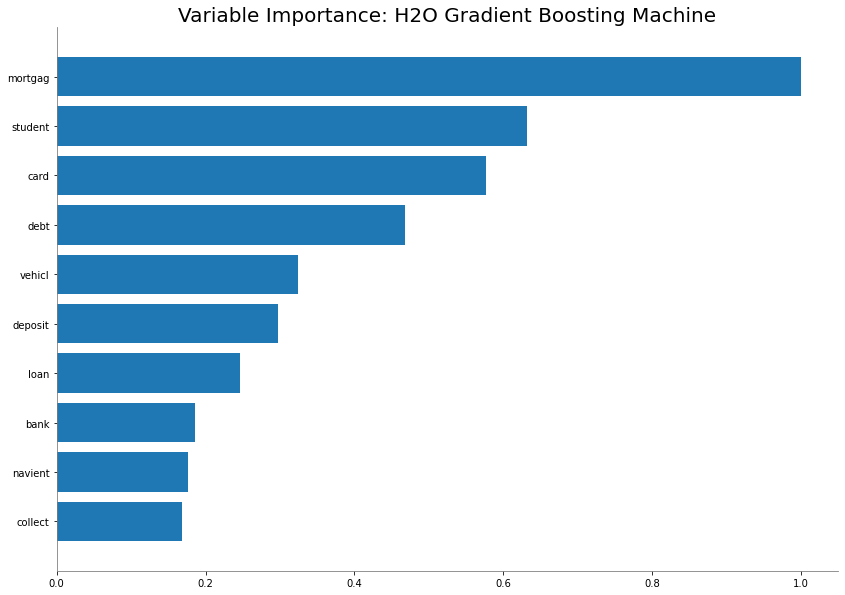

<Figure size 432x288 with 0 Axes>

In [663]:
# Plot the importance ranking of the predictor variables ///Citation 1
best_model.varimp_plot()

***5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

***Ans: The most significant predictor variable is mortgag and the least important predictor variable is collect. Therefore, predictor variable "collect" will be removed.***

***!!! This cell below is originally written !!!***




In [673]:
# Remove the predictor variable "collect" 
x_1 = x[:190] + x[191:]

['abil', 'abl', 'absolut', 'abus', 'accept', 'access', 'access account', 'accord', 'account', 'account account', 'account balanc', 'account bank', 'account call', 'account close', 'account credit', 'account inform', 'account never', 'account number', 'account open', 'account report', 'account would', 'accru', 'acct', 'accur', 'acknowledg', 'act', 'action', 'activ', 'actual', 'ad', 'addit', 'address', 'adjust', 'admit', 'advanc', 'advantag', 'advertis', 'advis', 'affect', 'affidavit', 'afford', 'agenc', 'agent', 'agre', 'agreement', 'alert', 'alleg', 'alleg debt', 'alli', 'allow', 'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'america', 'american', 'american express', 'amount', 'amount owe', 'and/or', 'annual', 'anoth', 'answer', 'anyon', 'anyth', 'apart', 'appar', 'appeal', 'appear', 'appli', 'applic', 'apprais', 'appreci', 'approv', 'approxim', 'around', 'arrang', 'arriv', 'ask', 'ask speak', 'assess', 'asset', 'assign', 'assist', 'associ', 'assum', 'assur', 'attach', 'at

In [674]:
# Train the model again ///Citation 2
aml.train(x = x_1, y = y, training_frame = h2o_train_df, validation_frame=h2o_test_df)

AutoML progress: |
01:20:32.793: Project: AutoML_7_20221108_12032
01:20:32.793: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:20:32.799: Setting stopping tolerance adaptively based on the training frame: 0.0065077912361128625
01:20:32.799: Build control seed: 10
01:20:32.802: training frame: Frame key: AutoML_7_20221108_12032_training_py_558_sid_b375    cols: 1001    rows: 23612  chunks: 28    size: 19845506  checksum: -5110923649571739560
01:20:32.804: validation frame: Frame key: py_559_sid_b375    cols: 1001    rows: 5904  chunks: 7    size: 4945608  checksum: 8322038229539175508
01:20:32.805: leaderboard frame: Frame key: py_559_sid_b375    cols: 1001    rows: 5904  chunks: 7    size: 4945608  checksum: 8322038229539175508
01:20:32.805: blending frame: NULL
01:20:32.805: response column: target
01:20:32.805: fold column: null
01:20:32.807: weights column: null
01:20:32.808: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_8_20221108_15421


Model Summary: 
    number_of_trees
--  -----------------
    70

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.034139840872420564
RMSE: 0.18476969684561526
LogLoss: 0.12724835987824237
Mean Per-Class Error: 0.04075603162971608
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3     4     5     Error      Rate
----  ----  ----  ----  ----  ----  ---------  ------------
8294  97    40    21    10    10    0.0210104  178 / 8,472
119   5580  8     36    4     4     0.029734   171 / 5,751
46    24    4064  5     0     2     0.0185945  77 / 4,141
38    35    4     2937  0     1     0.0258706  78 / 3,015
30    33    4     1     1038  0     0.0614828  68 / 1,106
45    42    8     1     3     1028  0.0878438  99 / 1,127
8572  5811  4128  3001  1055  1045  0.0284178  671 / 23,612

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.971582
2    0.993266
3    0.998052
4    0.99928
5    0.999788
6    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.10548072720683488
RMSE: 0.32477796601191233
LogLoss: 0.36709474570607364
Mean Per-Class Error: 0.16724494675304438
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1     2     3    4    5    Error      Rate
----  ----  ----  ---  ---  ---  ---------  -----------
1948  95    33    25   20   17   0.0888681  190 / 2,138
80    1246  4     54   2    8    0.106169   148 / 1,394
40    23    1034  8    4    4    0.0709793  79 / 1,113
28    74    8     616  2    4    0.15847    116 / 732
37    10    4     3    201  5    0.226923   59 / 260
39    27    23    3    2    173  0.35206    94 / 267
2172  1475  1106  709  231  211  0.116192   686 / 5,904

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.883808
2    0.961382
3    0.981707
4    0.993564
5    0.998814
6    1

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2022-11-08 01:54:22  0.024 sec         0                  0.833333         1.79176             0.824623                         nan             nan                0.833333           1.79176               0.811484                           nan               nan
    2022-11-08 01:54:38  16.520 sec        5                  0.468981         0.650023            0.129341                         nan             nan                0.489155           0.703569              0.155827                           nan               nan
    2022-11-08 01:54:48  26.864 sec        10                 0.356684         0.412088            0.103422                         nan             nan                0.395823           0.500956              0.14414                            nan            

In [675]:
# Calculate the training time ///Citation 1
d=meta_data['model_execution_time']
d['classification']=(time.time() - model_start_time)
meta_data['model_execution_time'] = d
meta_data

{'model_execution_time': {'regression': 4216.683512687683,
  'classification': 5171.146995306015}}

In [676]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                             mean_per_class_error    logloss      rmse       mse
XGBoost_3_AutoML_8_20221108_15421                0.167245   0.367095  0.324778  0.105481
XGBoost_4_AutoML_8_20221108_15421                0.167714   0.365783  0.323796  0.104844
XGBoost_2_AutoML_7_20221108_12032                0.170289   0.366573  0.325167  0.105734
GBM_2_AutoML_8_20221108_15421                    0.17463    0.404378  0.344547  0.118712
XGBoost_1_AutoML_7_20221108_12032                0.179346   0.369424  0.326212  0.106414
GBM_1_AutoML_7_20221108_12032                    0.181867   0.397387  0.343667  0.118107
GLM_1_AutoML_7_20221108_12032                    0.18625    0.399515  0.342792  0.117506
GLM_2_AutoML_8_20221108_15421                    0.188637   0.404226  0.344915  0.118966
DRF_1_AutoML_7_20221108_12032                    0.302929   0.611534  0.451008  0.203409
DRF_2_AutoML_8_20221108_15421                    0.306749   0.621458  0.454862  0.206899
[10 rows x 5 columns]

In [677]:
# Find the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])
best_model.algo

'xgboost'

In [679]:
# Use the best model to predict the complaint class ///Citation 2
pred=aml.leader.predict(h2o_test_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [696]:
# Print the prediction result ///Citation 2
print(pred)

  predict          p0           p1           p2           p3           p4           p5
        0  0.999085    0.000489797  0.000136761  8.79699e-05  9.16236e-05  0.00010928
        2  0.00318809  0.000847952  0.992179     0.000142569  0.00239456   0.00124753
        0  0.830124    0.159735     0.000354506  0.00771478   0.000247544  0.00182376
        2  0.0422885   0.000197115  0.954663     0.000454887  0.00207168   0.000325362
        2  0.00184244  0.000855463  0.99637      0.000227308  7.86852e-05  0.000625823
        1  0.207605    0.599933     0.0361149    0.00686769   0.0370849    0.112395
        0  0.492242    0.346787     0.0460524    0.0355079    0.0480012    0.0314094
        0  0.99795     0.0017711    6.35511e-05  5.9519e-05   3.16083e-05  0.000123798
        1  0.0802325   0.634849     0.13476      0.083106     0.0599933    0.00705922
        1  0.0204521   0.815219     0.000467836  0.162915     0.000210427  0.000735849
[5904 rows x 7 columns]



***!!! This cell below is originally written !!!***

In [724]:
# Plot the confusion matrix
aml.leader.confusion_matrix(h2o_test_df)

0,1,2,3,4,5,Error,Rate
1948.0,95.0,33.0,25.0,20.0,17.0,0.0888681,"190 / 2,138"
80.0,1246.0,4.0,54.0,2.0,8.0,0.1061693,"148 / 1,394"
40.0,23.0,1034.0,8.0,4.0,4.0,0.0709793,"79 / 1,113"
28.0,74.0,8.0,616.0,2.0,4.0,0.1584699,116 / 732
37.0,10.0,4.0,3.0,201.0,5.0,0.2269231,59 / 260
39.0,27.0,23.0,3.0,2.0,173.0,0.3520599,94 / 267
2172.0,1475.0,1106.0,709.0,231.0,211.0,0.1161924,"686 / 5,904"


***6. Does the model make sense?***

***Ans: Based on the confusion matrix, the overall accuracy is arount 89%, which means the prediction is quite accurate. Therefore, the model does make sense and it could classify different kinds of complaints based on the texts.***

***!!! This cell below is originally written !!!***




In [729]:
# Add regularization and regularizor search algorithm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

# trainset, testset, valid = data.split_frame(ratios=[.7, .15])
# x = trainset.columns
# y = "MEDV"
hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the glm estimator
gdm_2 = H2OGeneralizedLinearEstimator(family = 'auto')

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = gdm_2, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = x_1, y = y, training_frame = h2o_train_df, validation_frame=h2o_test_df)

# sort the grid models by decreasing MAE
sorted_grid = grid.get_grid(sort_by = 'mse', decreasing = True)
print(sorted_grid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


Hyper-Parameter Search Summary: ordered by decreasing mse
    lambda    model_ids                                                          mse
--  --------  -----------------------------------------------------------------  --------
    1         Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_1  0.587539
    0.5       Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_2  0.587539
    0.1       Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_3  0.356833
    0.01      Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_4  0.147889
    0         Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_8  0.132769
    1e-05     Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_7  0.122037
    0.0001    Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_6  0.116529
    0.001     Grid_GLM_py_558_sid_b375_model_python_1667868586318_23333_model_5  0.113721


***7. Does regularization help?***

***Ans: Yes, regularization helps. According to the table shown above, when the regularization is 0, the mse is 0.12, when we apply a regularizor of 0.001, the mse could be reduced to 0.11. However, if the regularizor is set to 1, the mse is greatly increased. Therefore, we need to be careful when selecting regularizor. With an appropriate regularizor, the model could benefit from penalizing the noise and outliers appropriately.***

***8. Which independent variables are significant?***

***Ans: As plotted in the importance ranking figure, the most important independent variables are "mortgag" and "student", which means by detecting these keywords, the model is more likely to classify the complaint types correctly.***

***9. Which hyperparameters are important?***

***Ans: Regularizor is an important hyperparameter and needs caution to choose. Apart from regularizor, learning rate is also an important hyperparameter.***

***10. Evaluation of the model***

***Ans: To fairly evaluate the performance of this model, a confusion matrix is plotted. Confusion matrix cares about "True Positive", "False Positive", "False Negative" and "True Negative", in the multiclass classification task, only the predictions on the diagonal will be considered as true, i.e. correctly predicted. The others will be put into the corresponding predicted class. Based on this metric, we could evaluate the performance of our model by summing up the cases on the diagonal and divide it by the total case numbers and we finally get an accuracy of 89%. To prevent overfitting, regularization is added to penalize noise and outliers and the result turns out that the regularization does help to prevent overfitting.***

## Conclusion

This notebook has tried to apply the automl algorithm to regression, binary classification and multiclass classification tasks. After analyzing the data, the model is trained with a trainset, validated with a validation set and finally tested with a test set. Based on different evaluation metrics, we could draw a conclusion that automl is a powerful and useful technique for training and predicting models, although for different tasks, hyperparameters need to be carefully chosen accordingly.

## References

1. Aiskunks. “SKUNKS_SKOOL/6105_H2O_automl_lending_club.Ipynb at Main · Aiskunks/skunks_skool.” GitHub, https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb. 

2. “Multi-Class Text Classification Using H20 and Scikit-Learn.” Section, https://www.section.io/engineering-education/building-a-multi-class-text-classification-model-using-h2o-and-sckit-learn/. 

3. Arunjathari. “Starter: Boston-House-Price-Data.” Kaggle, Kaggle, 23 Sept. 2020, https://www.kaggle.com/code/arunjathari/starter-boston-house-price-data/notebook. 

4. Kanuriviveknag. “Breast Cancer Prediction.” Kaggle, Kaggle, 28 Oct. 2022, https://www.kaggle.com/code/kanuriviveknag/breast-cancer-prediction/data. 

5. “Model Explainability.” Model Explainability - H2O 3.38.0.2 Documentation, https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html. 